In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits import mplot3d

# Hepler functions

In [4]:
def plot_GP_reward(X1, X2, Y):
    figsize = (10, 4 )
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X1, X2, Y, cmap='viridis', edgecolor='none')
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X2, X1, Y)
    plt.show()


# Dataset

## load data

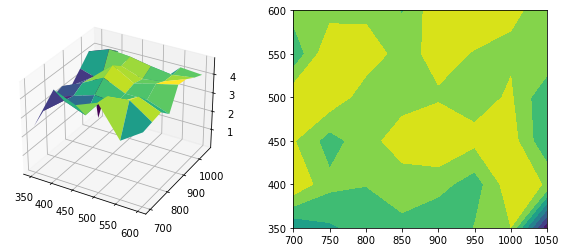

In [37]:
# load data -----
Rs = np.load('source_reward.npy')
lxy = np.arange(700, 1100, 50)
dia = np.arange(350, 650, 50)
X, Y = np.meshgrid(dia, lxy)
plot_GP_reward(X, Y, Rs)


## Training 

In [10]:
# scikit-learn gaussian process regression -----
X1, X2, R_train = X.flatten(), Y.flatten(), Rs.flatten()
X1, X2, R_train = X1.reshape(-1, 1), X2.reshape(-1, 1), R_train.reshape(-1, 1)
X_train = np.concatenate((X1, X2), axis=1)

## Posterior

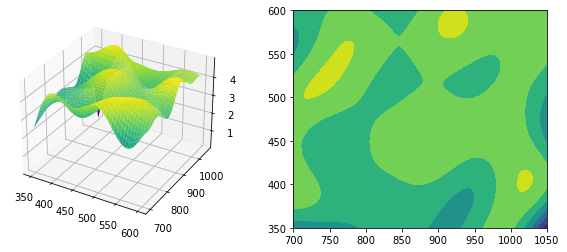

In [22]:
# define kernel
kernel = 1 * RBF(10, (1e-3, 1e3))
gp = GPR(kernel=kernel, alpha=0.01, n_restarts_optimizer=10)
gp.fit(X_train, R_train)

# predict on test points
# X_test = np.linspace()
dia_test = np.arange(350, 601, 1.0)
lxy_test = np.arange(700, 1051, 1.0)
X1_org_test, X2_org_test = np.meshgrid(dia_test, lxy_test)

X1_test, X2_test = X1_org_test.flatten(), X2_org_test.flatten()
X1_test, X2_test = X1_test.reshape(-1, 1), X2_test.reshape(-1, 1)
X_test = np.concatenate((X1_test, X2_test), axis=1)
R_GP_org, var = gp.predict(X_test, return_std=True)
R_GP = R_GP_org.reshape(len(lxy_test), len(dia_test))

plot_GP_reward(X1_org_test, X2_org_test, R_GP)



## downsample reward function 

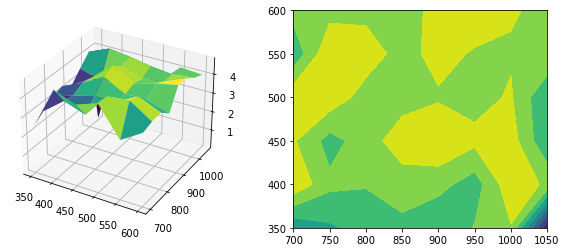

In [45]:
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()
downsampled_reward = []
X_t = []
R_GP_org_2 = R_GP_org.tolist()
for i in range(len(X_test_list)):
    if X_test_list[i] in X_train_list:
        X_t.append(X_test_list[i])
        downsampled_reward.append(R_GP_org_2[i][0])

X1 = np.array(X_t)[:, 0].reshape(8, 6)
X2 = np.array(X_t)[:, 1].reshape(8, 6)
R = np.array(downsampled_reward).reshape(8, 6)
plot_GP_reward(X1, X2, R)